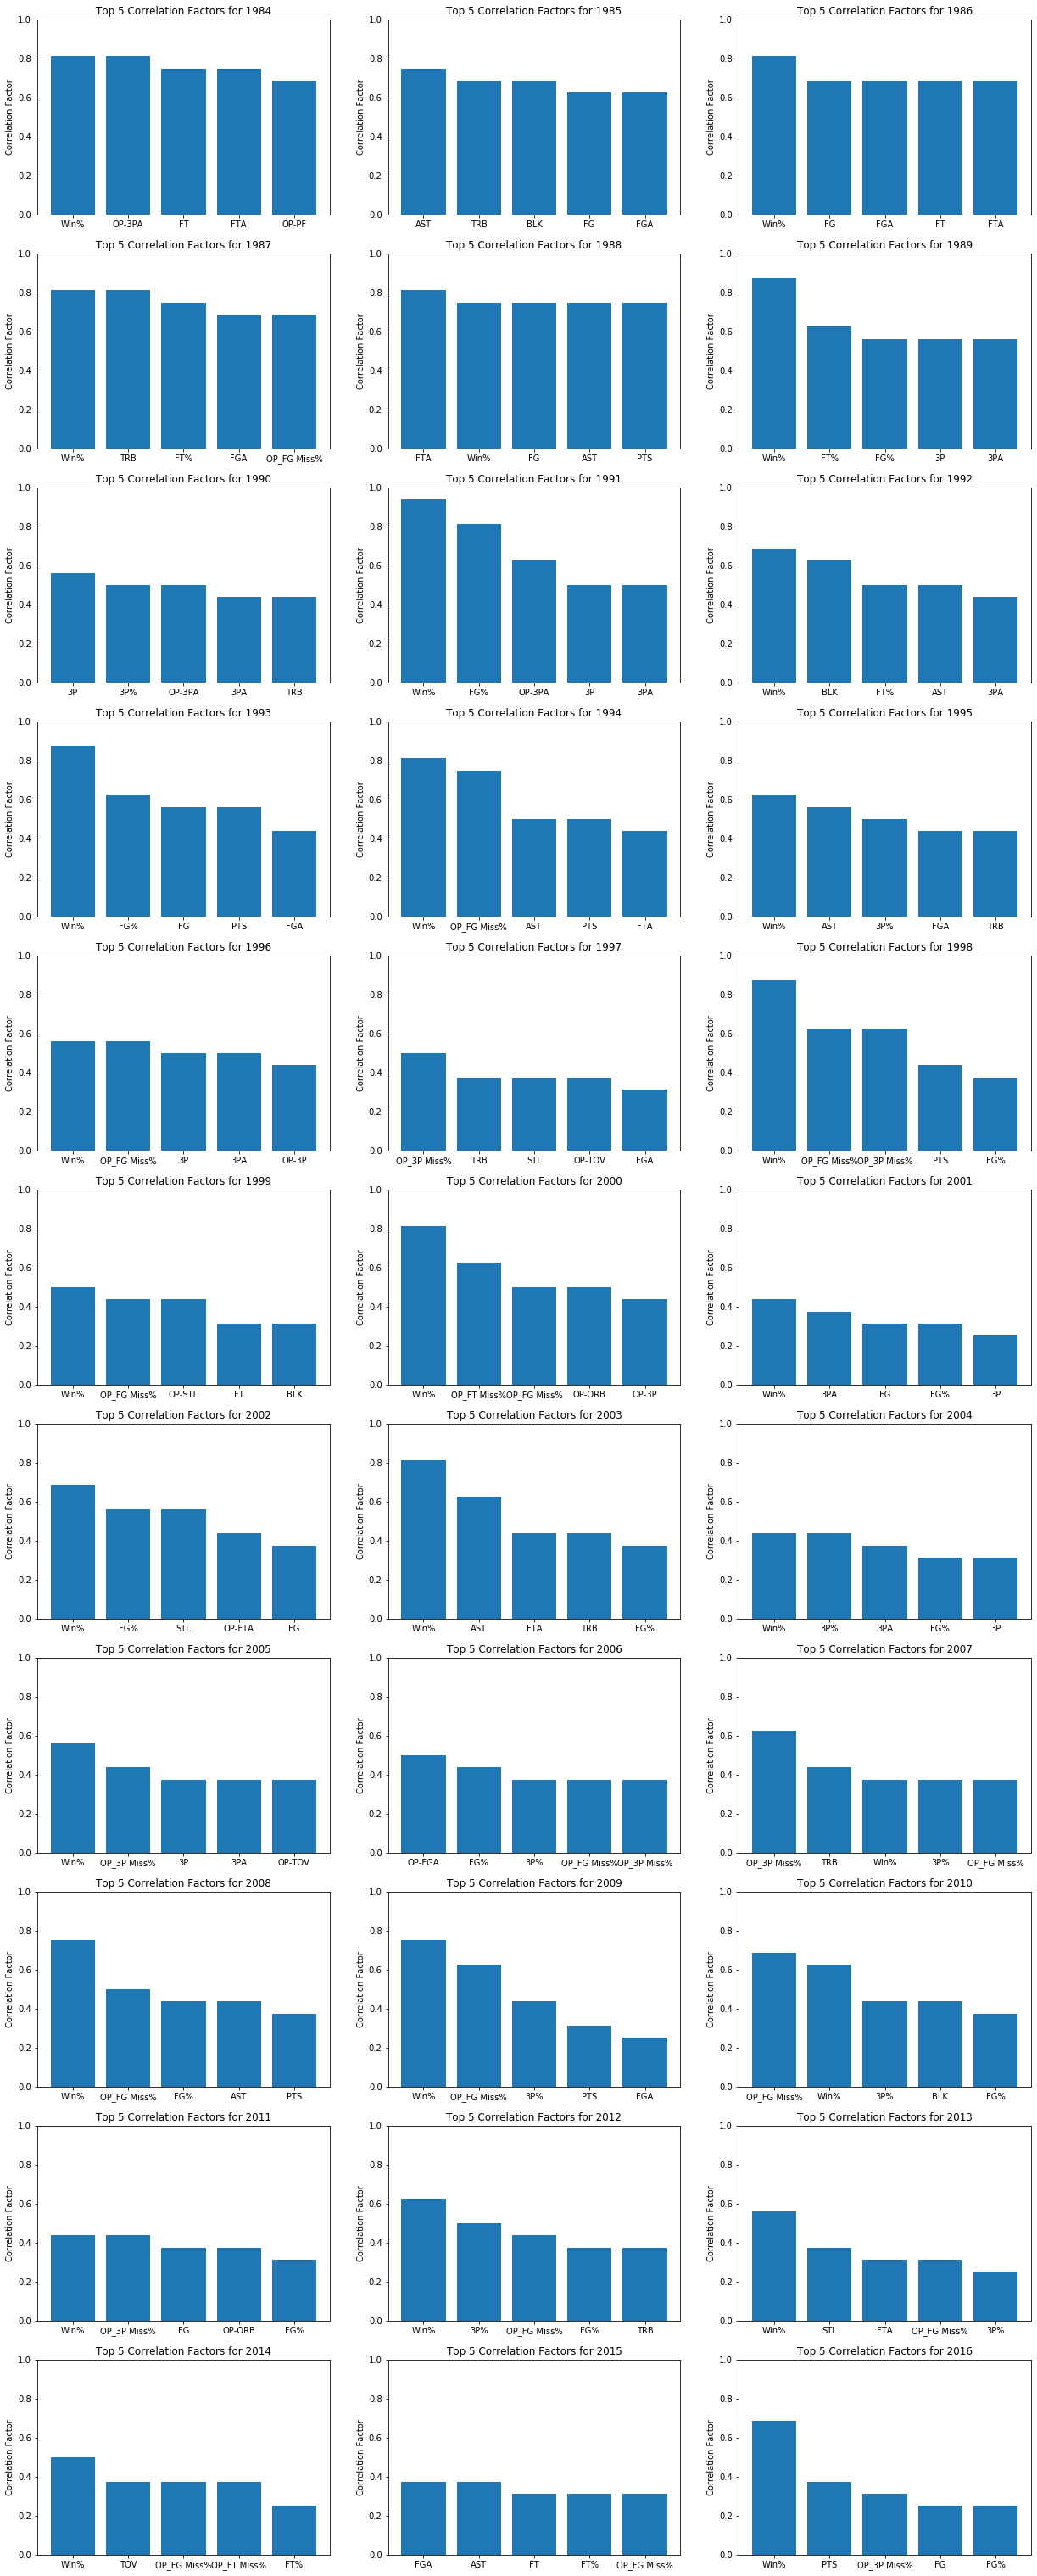

{'Win%': 28, 'OP-3PA': 3, 'FT': 4, 'FTA': 6, 'OP-PF': 1, 'AST': 8, 'TRB': 8, 'BLK': 4, 'FG': 8, 'FGA': 8, 'FT%': 5, 'OP_FG Miss%': 15, 'PTS': 7, 'FG%': 14, '3P': 7, '3PA': 8, '3P%': 9, 'OP-3P': 2, 'OP_3P Miss%': 7, 'STL': 3, 'OP-TOV': 2, 'OP-STL': 1, 'OP_FT Miss%': 2, 'OP-ORB': 2, 'OP-FTA': 1, 'OP-FGA': 1, 'TOV': 1}


In [2]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import numpy as np
import pandas as pd
import operator
%matplotlib inline

plt.figure(figsize=(21, 55))

#Pulls data from website for each team and each year. Then creates an array with all of the data.
Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','KCK','LAL','MIL','NJN','NYK','PHI','PHO','POR','SAS','SDC','SEA','UTA','WSB']
n = 0
Year = '1984'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
    
#Array data is then transferred to a dataframe. Certain percentage stats are then calculated and input into the dataframe. Data is then normalized by the league averages.
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']

#Playoff data is inserted. Who made the playoffs and who didn't.
Playoff_List = [True,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,False,False,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)

#The top 16 in each stat is collected and ran against the teams that made the playoffs. If all teams that are in the top 16 of the stat are the teams that made the playoffs. The correlation factor would be 100%.
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1984 = DF

Top_Stat_Counter = {}
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1

#Graphs are made of the top 5 correlation factors for each season.
plt.subplot(11, 3, 1)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))




Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','KCK','LAC','LAL','MIL','NJN','NYK','PHI','PHO','POR','SAS','SEA','UTA','WSB']
n = 0
Year = '1985'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,True,True,True,True,True,False,True,False,False,False,True,True,True,False,True,True,True,True,False,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1985 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 2)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIL','NJN','NYK','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1986'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,False,True,True,True,False,True,False,False,True,True,True,False,True,False,True,True,True,False,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1986 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 3)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIL','NJN','NYK','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1987'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,False,True,True,True,True,True,True,False,True,True,False,False,True,False,True,False,False,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1987 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 4)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIL','NJN','NYK','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1988'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,True,True,True,True,False,True,False,False,True,True,False,True,False,False,True,False,True,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1988 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 5)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','NJN','NYK','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1989'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,True,False,True,True,True,True,False,False,True,False,True,False,True,True,True,True,False,False,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1989 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 6)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1990'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,False,True,True,True,True,True,False,True,True,False,True,False,True,False,False,True,False,True,True,True,False,True,False,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1990 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 7)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1991'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,False,False,False,True,True,True,True,False,True,False,True,False,False,True,False,True,True,True,False,True,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1991 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 8)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1992'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,False,True,True,False,False,True,True,False,True,True,True,True,False,False,True,True,False,False,True,True,False,True,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1992 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 9)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1993'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,True,True,False,False,False,False,True,True,True,True,False,False,False,True,True,False,False,True,True,False,True,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1993 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 10)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1994'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,False,False,True,True,False,True,False,True,True,True,False,False,True,False,False,True,True,True,False,True,True,False,True,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1994 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 11)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','UTA','WSB']
n = 0
Year = '1995'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,True,True,False,True,False,False,True,True,False,True,False,False,False,False,True,True,False,True,True,False,True,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1995 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 12)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WSB']
n = 0
Year = '1996'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,False,False,True,True,False,False,True,False,True,True,False,True,True,False,False,False,True,True,False,True,True,True,True,True,False,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1996 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 13)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WSB']
n = 0
Year = '1997'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,False,True,True,False,False,False,True,False,True,False,True,True,True,False,True,False,True,True,False,True,True,False,False,True,False,True,False,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1997 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 14)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WAS']
n = 0
Year = '1998'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,False,True,True,True,False,False,False,False,True,True,False,True,True,False,True,True,True,False,False,True,True,False,True,True,False,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1998 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 15)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WAS']
n = 0
Year = '1999'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,False,False,False,False,False,False,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_1999 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 16)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WAS']
n = 0
Year = '2000'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,False,True,False,False,False,False,True,False,False,True,False,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2000 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 17)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))



Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','VAN','WAS']
n = 0
Year = '2001'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,False,True,False,False,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2001 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 18)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHH','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','WAS']
n = 0
Year = '2002'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,True,False,False,True,False,True,False,False,True,False,True,False,False,False,True,True,False,True,True,False,True,True,True,True,True,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2002 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 19)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','WAS']
n = 0
Year = '2003'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,False,False,True,False,True,False,False,True,False,True,False,False,True,True,True,True,False,True,True,True,True,True,True,False,False,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2003 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 20)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','WAS']
n = 0
Year = '2004'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,False,False,True,True,True,False,True,True,False,True,True,True,True,True,True,True,True,False,False,False,False,True,True,False,False,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2004 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 21)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','WAS']
n = 0
Year = '2005'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,True,False,True,False,True,True,True,False,True,True,False,False,True,True,False,False,True,False,False,False,True,True,False,True,True,True,False,False,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2005 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 22)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOK','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','WAS']
n = 0
Year = '2006'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,False,False,True,True,True,True,True,False,False,True,True,True,True,True,True,False,True,False,False,False,False,True,False,True,True,False,False,False,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2006 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 23)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOK','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','WAS']
n = 0
Year = '2007'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [False,False,False,True,True,True,True,True,True,True,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,True,False,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2007 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 24)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','ORL','PHI','PHO','POR','SAC','SAS','SEA','TOR','UTA','WAS']
n = 0
Year = '2008'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,False,True,True,True,True,False,True,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,False,True,True,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2008 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 25)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2009'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,True,True,True,True,False,True,False,False,True,False,True,False,False,False,True,False,False,True,True,False,True,False,True,False,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2009 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 26)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2010'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,True,True,True,True,False,False,False,False,False,True,False,True,True,False,False,False,False,True,True,False,True,True,False,True,False,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2010 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 27)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2011'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,False,True,True,False,False,False,True,False,True,True,True,False,False,False,True,True,True,True,True,False,True,False,True,False,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2011 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 28)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NJN','NOH','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2012'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,False,True,True,False,False,False,True,True,True,True,True,False,False,False,False,True,True,True,True,False,False,False,True,False,True,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2012 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 29)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','BRK','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOH','OKC','NYK','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2013'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,False,True,False,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2013 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 30)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','BRK','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2014'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,False,True,True,True,False,True,False,False,True,True,True,True,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,False,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2014 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 31)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2015'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,True,False,True,True,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,False,True,False,True,True,False,True]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2015 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 32)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))


Team_List = ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
n = 0
Year = '2016'
Stats = np.zeros(shape = (len(Team_List),31))
for team in Team_List:
    url = 'https://www.basketball-reference.com/teams/{}/{}/splits/'.format(Team_List[n],Year)
    page = requests.get(url)
    content = BeautifulSoup(page.content, 'html.parser')
    tdvalues = content.find_all('td')
    Nov_Values = tdvalues[257:288]
    c = []
    for row in Nov_Values:
        a = str(row)
        b = a[a.index('>') + 1:a.index('</')]
        c.append(b)
    c = [float(x) for x in c]
    Stats[n] = c
    n +=1
DF = pd.DataFrame(Stats)
WinPer = DF.iloc[:,1].div(DF.iloc[:,0])
FGPer = DF.iloc[:,3].div(DF.iloc[:,4])
THPPer = DF.iloc[:,5].div(DF.iloc[:,6])
FTPer = DF.iloc[:,7].div(DF.iloc[:,8])
OP_FGPer = DF.iloc[:,17].div(DF.iloc[:,18])
OP_THPPer = DF.iloc[:,19].div(DF.iloc[:,20])
OP_FTPer = DF.iloc[:,21].div(DF.iloc[:,22])
DF.insert(3, 'Win%', WinPer)
DF.insert(6, 'FG%', FGPer)
DF.insert(9, '3P%', THPPer)
DF.insert(12, 'FT%', FTPer)
DF.insert(23, 'OP-FG Miss%',1 - OP_FGPer)
DF.insert(26, 'OP-3P Miss%',1 - OP_THPPer)
DF.insert(29, 'OP-FT Miss%',1 - OP_FTPer)
League_Sum = DF.sum(numeric_only = True)
League_Avg = pd.DataFrame(League_Sum.div(len(Team_List)))
League_Avg = League_Avg.T
DF = DF.div(League_Avg.iloc[0])
DF.insert(0,"Team",Team_List)
DF.columns = ['Team','G','W','L','Win%','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','OP-FG','OP-FGA','OP_FG Miss%','OP-3P','OP-3PA','OP_3P Miss%','OP-FT','OP-FTA','OP_FT Miss%','OP-ORB','OP-TRB','OP-AST','OP-STL','OP-BLK','OP-TOV','OP-PF','OP-PTS']
Playoff_List = [True,True,False,True,False,True,True,False,True,True,True,True,True,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,False,False]
DF.insert(1, "Playoff Birth", Playoff_List)
z = 0
x = list(DF.columns[5:])
factors = {}
for items in x:
    z = 0
    for team in DF[DF['Playoff Birth'] == False][items]:
        if team > DF[DF['Playoff Birth'] == True].min()['{}'.format(items)]:
            z+=1
    factors[items] = (16-z)/16
Sorted_Factors = dict(sorted(factors.items(), key=operator.itemgetter(1), reverse=True)[:5])
DF_2016 = DF
for key in Sorted_Factors.keys():
    if key in Top_Stat_Counter.keys():
        Top_Stat_Counter[key] += 1
    else:
        Top_Stat_Counter[key] = 1
plt.subplot(11, 3, 33)
plt.bar(list(Sorted_Factors.keys()),list(Sorted_Factors.values()))
plt.ylim(0, 1)
plt.ylabel('Correlation Factor')
plt.title('Top 5 Correlation Factors for {}'.format(Year))




plt.show()
print(Top_Stat_Counter)

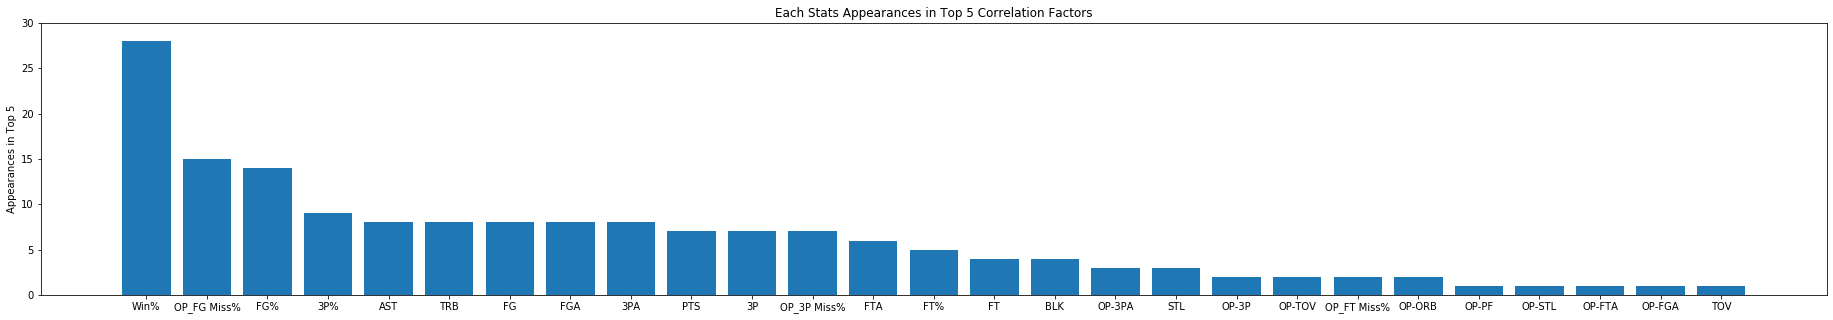

In [3]:
Sorted_Stat_Counter = dict(sorted(Top_Stat_Counter.items(), key=operator.itemgetter(1), reverse=True)[:])

plt.figure(figsize=(32, 5))
plt.bar(list(Sorted_Stat_Counter.keys()),list(Sorted_Stat_Counter.values()))
plt.ylim(0, 30)
plt.ylabel('Appearances in Top 5')
plt.title('Each Stats Appearances in Top 5 Correlation Factors')
plt.savefig('App_TopFive.png')

plt.show()